In [14]:
%run "part01_preprocessing.ipynb"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

# Content
     
  
**EDA**
- Analise Univariada
- Analise Bivariada
- Analise Multivariada
- Insights


# EDA

Existe nessa base de dados apenas duas modalidades de compra no cartão que é a vista ou parcelado, somadas ela corresponde as compras que o cliente fez no periodo de tempo.

Importante salientar que a base de dados a um banco cujo o país não foi especificado, como não temos mais informações não podemos aferir nada sobre a unidade da moeda e o perfil do cliente baseado no país.

Outro ponto que é bom lembrar é que os dados registrados são semestrais.

- Qual o lucro do banco referente ao pagamento do cartão de crédito?
- Quantos são os clientes não ativos? Quantos são os clientes pouquissimo ativos?
- Quantos são os clientes que compram a vista? Quantos compram a prazo?
- Quantos são os clientes que excederam o cartão de crédito? Quantos estão operando com adiantamento em dinheiro? Quantos não?
- Quais são os clientes que possuem débitos com o banco referente ao cartão de crédito? Quantos são os clientes que pagaram menos que o minimo estipulado? Quais não pagaram nada?
- Quais os melhores clientes do Banco? Quais são os piores clientes do Banco?

In [15]:
#Verificar clientes que possuem CASH_ADVANCE_FREQUENCY superior a 1
#Verificar se com os dados disponiveis é possivel descobrir a taxa mínima cobrada pelo banco
#Verificar porque o saldo de crédito varia apesar do cliente não fazer compras 
numerical_features = data_new.select_dtypes(include = ['int64','float64']).columns.values

In [16]:
def summary_stats(df):
    # central tendency: mean, median    
    df = df[numerical_features]
    
    count_ = pd.DataFrame(df.apply(np.size))
    pct_ = pd.DataFrame(df.apply(np.size)/len(data_new)*100)
    sum_ = pd.DataFrame(df.apply(np.sum))
    mean_ = pd.DataFrame(df.apply(np.mean))
    std_ = pd.DataFrame(df.apply(np.std))
    median_ = pd.DataFrame(df.apply(np.median))
    
    min_ = pd.DataFrame(df.apply(min))
    max_ = pd.DataFrame(df.apply(max))
    range_ = pd.DataFrame(df.apply(lambda x: x.max() - x.min()))
    q1_ = pd.DataFrame(df.apply(lambda x: np.percentile(x,25)))
    q3_ = pd.DataFrame(df.apply(lambda x: np.percentile(x,75)))
    
    #skewness_= pd.DataFrame(df.apply(lambda x: x.skew()))
    #kurtosis_ = pd.DataFrame(df.apply(lambda x: x.kurtosis()))
    
    summary = pd.concat([count_, pct_, mean_, std_, median_, sum_, min_, max_, range_, q1_,q3_],axis=1)
    summary.columns = ['counts', '%','mean','std','median','sum','min','max', 'range', '25%','75%']
 

    cm = sns.light_palette("#2D7DAB", as_cmap = True)
    
    display(summary.style.format('{:.2f}').background_gradient(subset=(summary.index[2:],summary.columns[:]),cmap=cm))

In [17]:
data_new.sample(3)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,PROFIT
7669,C17875,16.834929,0.454545,15.00,15.00,0.00,209.025389,0.090909,0.090909,0.0,0.090909,1.0,1.0,7500.0,430.213001,86.959785,0.0,11.0,206.187612
6125,C16296,540.020858,1.000000,612.23,495.61,116.62,1708.923217,0.666667,0.166667,0.5,0.333333,10.0,10.0,2000.0,1642.068707,419.956251,0.0,12.0,-679.084510
7028,C17219,119.237712,1.000000,342.74,0.00,342.74,0.000000,1.000000,0.000000,1.0,0.000000,0.0,20.0,2000.0,327.166041,165.207233,0.0,12.0,-15.573959


## Analise Univariada

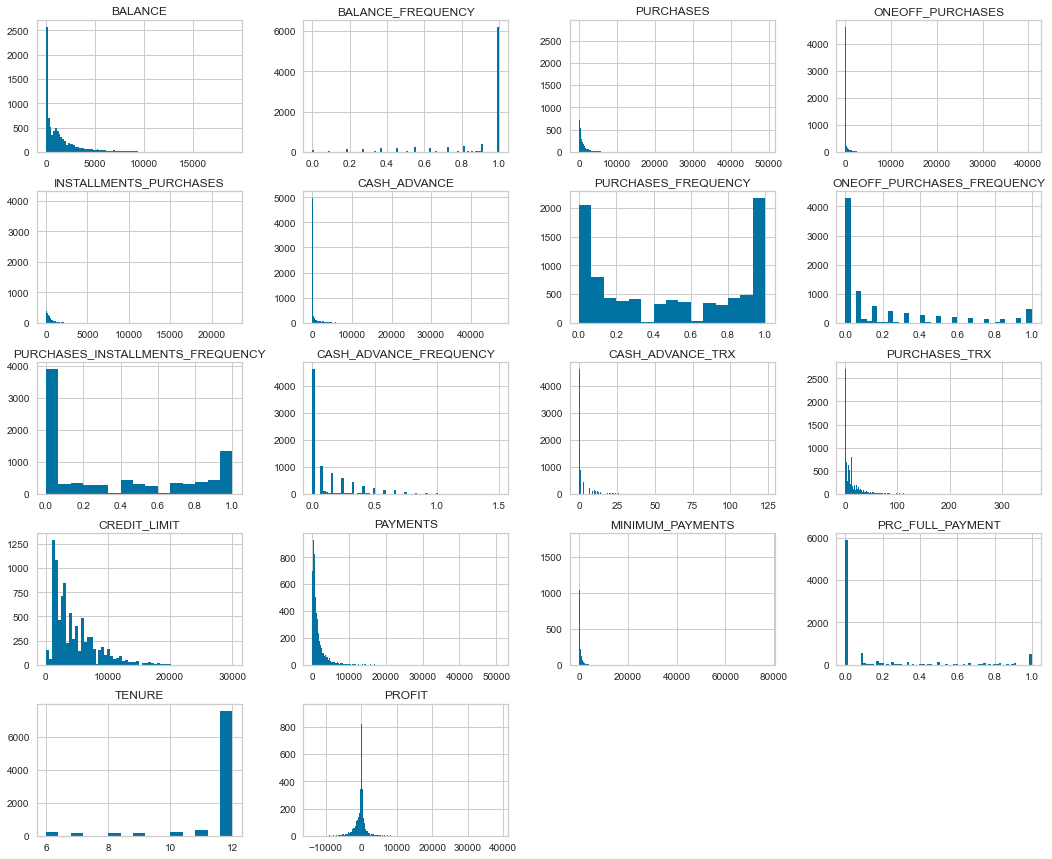

In [18]:
data_new[numerical_features].hist(figsize=(18,15), bins='auto');

In [34]:
def func_pct_abs(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.2f}%\n\n{:d}".format(pct, absolute) 

NameError: name 'sizes' is not defined

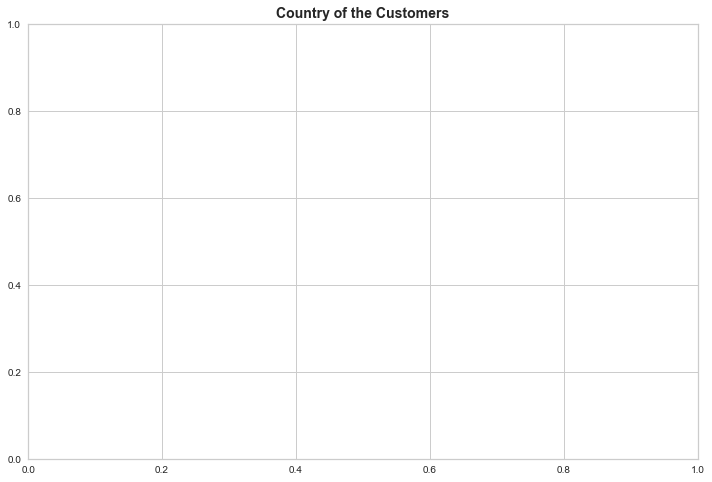

In [40]:
plt.figure(figsize=(12,8))
plt.title('Country of the Customers', fontsize=14, fontweight='bold')

#labels = country_resume.index.tolist()
#sizes = country_resume.tolist()

plt.pie(sizes, 
        labels=labels, 
        colors=['#4C96DC','#AFD4F8'],
        explode = (0, 0.1),
       
        #autopct = lambda pct: func_pct_abs(pct, sizes), 
        startangle=90,
        wedgeprops = { 'linewidth' : 1, 'edgecolor' : "black"}, textprops={'fontsize': 12})


plt.show()

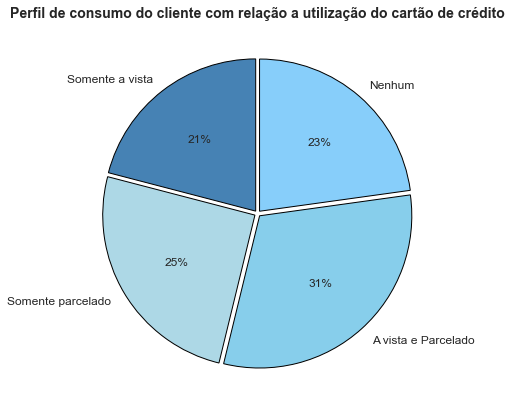

In [85]:
plt.figure(figsize=(7,7))
plt.title('Perfil de consumo do cliente com relação a utilização do cartão de crédito',fontsize=14, fontweight='bold');
plt.pie([len(data_new.loc[(data_new.ONEOFF_PURCHASES_FREQUENCY > 0) & (data_new.PURCHASES_INSTALLMENTS_FREQUENCY<=0.05)]),
         len(data_new.loc[(data_new.ONEOFF_PURCHASES_FREQUENCY <= 0.05) & (data_new.PURCHASES_INSTALLMENTS_FREQUENCY>0)]),
         len(data_new.loc[(data_new.ONEOFF_PURCHASES_FREQUENCY > 0.05) & (data_new.PURCHASES_INSTALLMENTS_FREQUENCY>0.05)]),
         len(data_new.loc[(data_new.ONEOFF_PURCHASES_FREQUENCY <= 0.05) & (data_new.PURCHASES_INSTALLMENTS_FREQUENCY<=0.05)])],   
               
        labels = ['Somente a vista', 'Somente parcelado', 'A vista e Parcelado','Nenhum'],
        colors=['#4682B4','#ADD8E6','#87CEEB','#87CEFA'],
        explode = (0.02, 0.02,0.02,0.02),
        startangle=90,
        autopct='%.0f%%',
        wedgeprops = { 'linewidth' : 1, 'edgecolor' : "black"}, textprops={'fontsize': 12});

### Qual o lucro do Banco com referente ao pagamento do cartão de crédito?

In [32]:
summary_stats(data_new)

,counts,%,mean,std,median,sum,min,max,range,25%,75%
BALANCE,8950.00,100.00,1564.47,2081.42,873.39,14002049.71,0.00,19043.14,19043.14,128.28,2054.14
BALANCE_FREQUENCY,8950.00,100.00,0.88,0.24,1.00,7851.57,0.00,1.00,1.00,0.89,1.00
PURCHASES,8950.00,100.00,1003.20,2136.52,361.28,8978683.26,0.00,49039.57,49039.57,39.63,1110.13
ONEOFF_PURCHASES,8950.00,100.00,592.44,1659.80,38.00,5302314.47,0.00,40761.25,40761.25,0.00,577.40
INSTALLMENTS_PURCHASES,8950.00,100.00,411.07,904.29,89.00,3679055.42,0.00,22500.00,22500.00,0.00,468.64
CASH_ADVANCE,8950.00,100.00,978.87,2097.05,0.00,8760896.46,0.00,47137.21,47137.21,0.00,1113.82
PURCHASES_FREQUENCY,8950.00,100.00,0.49,0.40,0.50,4388.64,0.00,1.00,1.00,0.08,0.92
ONEOFF_PURCHASES_FREQUENCY,8950.00,100.00,0.20,0.30,0.08,1812.00,0.00,1.00,1.00,0.00,0.30
PURCHASES_INSTALLMENTS_FREQUENCY,8950.00,100.00,0.36,0.40,0.17,3261.71,0.00,1.00,1.00,0.00,0.75
CASH_ADVANCE_FREQUENCY,8950.00,100.00,0.14,0.20,0.00,1209.54,0.00,1.50,1.50,0.00,0.22


**Analise**

O lucro do banco referente ao cartão de crédito dos seus 8950 clientes foi de $6,53M no periodo de seis meses. 

### Quantos são os clientes não ativos? Quantos são os clientes pouquissimo ativos?

In [33]:
# Clientes são ativos
summary_stats(data_new.loc[data_new.PURCHASES_FREQUENCY == 0 ])
# Clientes pouquissimos ativos... O valor de 0.15 de frequencia foi arbitrário
summary_stats(data_new.loc[(data_new.PURCHASES_FREQUENCY > 0) & (data_new.PURCHASES_FREQUENCY < 0.15)])

,counts,%,mean,std,median,sum,min,max,range,25%,75%
BALANCE,2043.00,22.83,2152.06,2119.43,1455.21,4396667.41,0.00,14581.46,14581.46,749.13,2843.67
BALANCE_FREQUENCY,2043.00,22.83,0.88,0.23,1.00,1802.83,0.00,1.00,1.00,0.90,1.00
PURCHASES,2043.00,22.83,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ONEOFF_PURCHASES,2043.00,22.83,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
INSTALLMENTS_PURCHASES,2043.00,22.83,0.04,1.55,0.00,86.95,0.00,66.95,66.95,0.00,0.00
CASH_ADVANCE,2043.00,22.83,1989.72,2470.36,1202.33,4064989.69,18.04,26194.05,26176.01,379.27,2705.47
PURCHASES_FREQUENCY,2043.00,22.83,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ONEOFF_PURCHASES_FREQUENCY,2043.00,22.83,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
PURCHASES_INSTALLMENTS_FREQUENCY,2043.00,22.83,0.00,0.00,0.00,0.25,0.00,0.17,0.17,0.00,0.00
CASH_ADVANCE_FREQUENCY,2043.00,22.83,0.27,0.20,0.25,557.17,0.08,1.50,1.42,0.09,0.33


,counts,%,mean,std,median,sum,min,max,range,25%,75%
BALANCE,823.00,9.20,1268.93,1779.87,641.28,1044332.05,0.00,12323.85,12323.85,42.80,1696.19
BALANCE_FREQUENCY,823.00,9.20,0.73,0.34,1.00,604.09,0.00,1.00,1.00,0.39,1.00
PURCHASES,823.00,9.20,258.93,389.92,110.00,213096.15,0.01,3191.00,3190.99,50.00,264.02
ONEOFF_PURCHASES,823.00,9.20,248.93,393.65,100.00,204872.73,0.00,3191.00,3191.00,43.95,256.69
INSTALLMENTS_PURCHASES,823.00,9.20,10.02,38.85,0.00,8245.42,0.00,554.16,554.16,0.00,0.00
CASH_ADVANCE,823.00,9.20,867.36,1805.39,0.00,713836.07,0.00,14827.31,14827.31,0.00,932.64
PURCHASES_FREQUENCY,823.00,9.20,0.09,0.01,0.08,72.74,0.08,0.14,0.06,0.08,0.08
ONEOFF_PURCHASES_FREQUENCY,823.00,9.20,0.08,0.03,0.08,63.88,0.00,0.14,0.14,0.08,0.08
PURCHASES_INSTALLMENTS_FREQUENCY,823.00,9.20,0.01,0.03,0.00,9.84,0.00,0.14,0.14,0.00,0.00
CASH_ADVANCE_FREQUENCY,823.00,9.20,0.12,0.19,0.00,98.59,0.00,1.12,1.12,0.00,0.17


**Analise**

2043 clientes, o que corresponde a 22.83% dos clientes do Banco, não fizeram nenhuma compra no cartão de crédito nos ultimos seis meses. O lucro do Banco com esses clientes foi de $808.594,43. Nenhum desses clientes possuem dividas com relação ao cartão de crédito com o Banco.

823 clientes, o que correspoden a 9.20% dos clientes do Banco, fizeram pouquissimas compras no cartão de crédito nos ultimos seis meses, em média cada um desses clientes fez em média três compras num periodo de seis meses. O lucro do Banco com esses clientes foi de $66.682,00. Esses clientes quando usam o cartão preferem em média 8x a compra a vista ao invés de parcelado.

### Quais são os clientes que compram apenas a vista? Quais compram apenas prazo?

In [21]:
#Clientes que compram apenas a vista
summary_stats(data_new.loc[(data_new.ONEOFF_PURCHASES_FREQUENCY > 0) & (data_new.PURCHASES_INSTALLMENTS_FREQUENCY == 0)])
#Clientes que compram apenas parcelado
summary_stats(data_new.loc[(data_new.ONEOFF_PURCHASES_FREQUENCY == 0) & (data_new.PURCHASES_INSTALLMENTS_FREQUENCY > 0)])

,counts,%,mean,std,median,sum,min,max,range,25%,75%
BALANCE,1874.00,20.94,1438.76,1902.92,817.58,2696239.24,0.00,15258.23,15258.23,122.28,1873.05
BALANCE_FREQUENCY,1874.00,20.94,0.84,0.27,1.00,1567.28,0.00,1.00,1.00,0.73,1.00
PURCHASES,1874.00,20.94,786.76,1449.30,364.90,1474386.42,0.01,22101.78,22101.77,130.75,918.01
ONEOFF_PURCHASES,1874.00,20.94,786.83,1449.28,364.90,1474515.07,0.01,22101.78,22101.77,130.75,918.01
INSTALLMENTS_PURCHASES,1874.00,20.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
CASH_ADVANCE,1874.00,20.94,870.53,1910.38,0.00,1631373.87,0.00,20277.33,20277.33,0.00,901.03
PURCHASES_FREQUENCY,1874.00,20.94,0.32,0.29,0.17,601.56,0.08,1.00,0.92,0.08,0.43
ONEOFF_PURCHASES_FREQUENCY,1874.00,20.94,0.32,0.29,0.17,601.14,0.08,1.00,0.92,0.08,0.43
PURCHASES_INSTALLMENTS_FREQUENCY,1874.00,20.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
CASH_ADVANCE_FREQUENCY,1874.00,20.94,0.13,0.20,0.00,235.48,0.00,1.25,1.25,0.00,0.17


,counts,%,mean,std,median,sum,min,max,range,25%,75%
BALANCE,2261.00,25.26,845.08,1684.47,100.43,1910720.26,0.00,16304.89,16304.89,24.64,1007.36
BALANCE_FREQUENCY,2261.00,25.26,0.82,0.28,1.00,1859.74,0.00,1.00,1.00,0.73,1.00
PURCHASES,2261.00,25.26,536.67,878.97,325.92,1213403.53,0.00,22500.00,22500.00,155.32,609.01
ONEOFF_PURCHASES,2261.00,25.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
INSTALLMENTS_PURCHASES,2261.00,25.26,537.64,880.54,327.37,1215605.34,0.00,22500.00,22500.00,155.32,610.47
CASH_ADVANCE,2261.00,25.26,419.77,1416.68,0.00,949107.42,0.00,19862.88,19862.88,0.00,0.00
PURCHASES_FREQUENCY,2261.00,25.26,0.69,0.31,0.78,1570.33,0.00,1.00,1.00,0.42,1.00
ONEOFF_PURCHASES_FREQUENCY,2261.00,25.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
PURCHASES_INSTALLMENTS_FREQUENCY,2261.00,25.26,0.66,0.31,0.75,1488.49,0.08,1.00,0.92,0.42,1.00
CASH_ADVANCE_FREQUENCY,2261.00,25.26,0.05,0.14,0.00,120.93,0.00,1.00,1.00,0.00,0.00


**Analise**

1874 clientes, o que corresponde a 20.94% dos clientes do Banco, fizeram apenas compras a vista no cartão de crédito nos ultimos seis meses. O lucro do Banco com esses clientes foi de $1.352.461,81. 

2261 clientes, o que correspoden a 25.26% dos clientes do Banco, fizeram pouquissimas compras no cartão de crédito nos ultimos seis meses. O lucro do Banco com esses clientes foi de $1.033.676,66

### Quantos são os clientes que excederam o cartão de crédito? Quantos estão operando com adiantamento em dinheiro? Quantos não?

In [22]:
# Clientes que excederam o limite de crédito
summary_stats(data_new.loc[(data_new.PURCHASES > data_new.CREDIT_LIMIT)])
# Clientes que excederam o limite de crédito e não estão operando com adiantamento em dinheiro
summary_stats(data_new.loc[(data_new.PURCHASES > data_new.CREDIT_LIMIT) & (data_new.CASH_ADVANCE == 0)])
# Clientes que excederam o limite de crédito e estão operando com adiantamento em dinheiro
summary_stats(data_new.loc[(data_new.PURCHASES > data_new.CREDIT_LIMIT) & (data_new.CASH_ADVANCE > 0)])

,counts,%,mean,std,median,sum,min,max,range,25%,75%
BALANCE,441.00,4.93,1318.89,2024.49,683.36,581632.50,22.37,19043.14,19020.77,288.10,1372.49
BALANCE_FREQUENCY,441.00,4.93,0.96,0.11,1.00,422.87,0.18,1.00,0.82,1.00,1.00
PURCHASES,441.00,4.93,4891.30,6187.14,2763.84,2157065.16,229.00,49039.57,48810.57,1704.22,5221.42
ONEOFF_PURCHASES,441.00,4.93,3236.46,5290.21,1644.79,1427278.62,0.00,40761.25,40761.25,543.00,3276.57
INSTALLMENTS_PURCHASES,441.00,4.93,1654.84,2169.14,1069.10,729786.54,0.00,15497.19,15497.19,343.82,1986.70
CASH_ADVANCE,441.00,4.93,312.68,1240.81,0.00,137890.24,0.00,19513.47,19513.47,0.00,0.00
PURCHASES_FREQUENCY,441.00,4.93,0.87,0.20,1.00,384.25,0.08,1.00,0.92,0.83,1.00
ONEOFF_PURCHASES_FREQUENCY,441.00,4.93,0.52,0.36,0.58,229.02,0.00,1.00,1.00,0.17,0.83
PURCHASES_INSTALLMENTS_FREQUENCY,441.00,4.93,0.65,0.37,0.83,287.71,0.00,1.00,1.00,0.42,1.00
CASH_ADVANCE_FREQUENCY,441.00,4.93,0.05,0.12,0.00,21.93,0.00,0.83,0.83,0.00,0.00


,counts,%,mean,std,median,sum,min,max,range,25%,75%
BALANCE,337.00,3.77,1186.23,1914.45,563.75,399761.02,22.37,19043.14,19020.77,258.54,1229.40
BALANCE_FREQUENCY,337.00,3.77,0.96,0.12,1.00,322.48,0.18,1.00,0.82,1.00,1.00
PURCHASES,337.00,3.77,4987.47,6130.54,2811.86,1680776.71,229.00,41050.40,40821.40,1764.00,5634.56
ONEOFF_PURCHASES,337.00,3.77,3336.72,5256.23,1748.98,1124472.97,0.00,40624.06,40624.06,502.54,3454.70
INSTALLMENTS_PURCHASES,337.00,3.77,1650.75,2083.37,1058.37,556303.74,0.00,15497.19,15497.19,350.00,2092.44
CASH_ADVANCE,337.00,3.77,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
PURCHASES_FREQUENCY,337.00,3.77,0.88,0.20,1.00,296.10,0.08,1.00,0.92,0.83,1.00
ONEOFF_PURCHASES_FREQUENCY,337.00,3.77,0.53,0.37,0.58,178.40,0.00,1.00,1.00,0.17,0.92
PURCHASES_INSTALLMENTS_FREQUENCY,337.00,3.77,0.66,0.38,0.83,221.65,0.00,1.00,1.00,0.42,1.00
CASH_ADVANCE_FREQUENCY,337.00,3.77,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


,counts,%,mean,std,median,sum,min,max,range,25%,75%
BALANCE,104.00,1.16,1748.76,2293.76,1072.03,181871.48,33.23,11631.32,11598.10,472.67,1925.64
BALANCE_FREQUENCY,104.00,1.16,0.97,0.09,1.00,100.39,0.55,1.00,0.45,1.00,1.00
PURCHASES,104.00,1.16,4579.70,6357.08,2530.30,476288.45,550.00,49039.57,48489.57,1611.45,4585.83
ONEOFF_PURCHASES,104.00,1.16,2911.59,5386.05,1391.06,302805.65,0.00,40761.25,40761.25,582.31,2832.05
INSTALLMENTS_PURCHASES,104.00,1.16,1668.10,2426.28,1138.54,173482.80,0.00,14686.10,14686.10,321.10,1765.71
CASH_ADVANCE,104.00,1.16,1325.87,2277.10,547.41,137890.24,18.56,19513.47,19494.91,203.72,1587.26
PURCHASES_FREQUENCY,104.00,1.16,0.85,0.21,1.00,88.15,0.17,1.00,0.83,0.69,1.00
ONEOFF_PURCHASES_FREQUENCY,104.00,1.16,0.49,0.31,0.50,50.62,0.00,1.00,1.00,0.24,0.68
PURCHASES_INSTALLMENTS_FREQUENCY,104.00,1.16,0.64,0.36,0.75,66.06,0.00,1.00,1.00,0.39,1.00
CASH_ADVANCE_FREQUENCY,104.00,1.16,0.21,0.16,0.17,21.93,0.08,0.83,0.75,0.08,0.28


**Analise**

441 clientes, o que corresponde a 4.93% dos clientes do Banco, excederam o limite do valor do cartão de crédito. A divida do Banco com esses clientes foi de $157.588,25.

### Quais são os clientes que possuem débitos com o banco referente ao cartão de crédito? Quantos são os clientes que pagaram menos que o minimo estipulado? Quais não pagaram nada?

In [23]:
# Clientes que possuem débito com o banco
summary_stats(data_new.loc[data_new.PAYMENTS < data_new.PURCHASES])
# Clientes que possuem débito com o banco e pagaram menos que o mínimo estipulado
summary_stats(data_new.loc[(data_new.PAYMENTS < data_new.PURCHASES) & (data_new.PAYMENTS > 0)])
# Clientes que possuem débito com o banco e não pagaram nada
summary_stats(data_new.loc[(data_new.PAYMENTS < data_new.PURCHASES) & (data_new.PAYMENTS ==0)]) 

,counts,%,mean,std,median,sum,min,max,range,25%,75%
BALANCE,2748.00,30.70,1145.30,1794.25,396.16,3147288.85,0.00,18495.56,18495.56,84.01,1436.25
BALANCE_FREQUENCY,2748.00,30.70,0.90,0.22,1.00,2480.46,0.00,1.00,1.00,0.91,1.00
PURCHASES,2748.00,30.70,1967.43,3049.56,1130.86,5406503.45,0.01,49039.57,49039.56,485.84,2348.02
ONEOFF_PURCHASES,2748.00,30.70,1203.64,2460.71,520.73,3307591.06,0.00,40761.25,40761.25,0.00,1455.70
INSTALLMENTS_PURCHASES,2748.00,30.70,764.22,1224.06,402.06,2100071.35,0.00,22500.00,22500.00,99.00,981.97
CASH_ADVANCE,2748.00,30.70,248.59,756.99,0.00,683134.58,0.00,8824.70,8824.70,0.00,0.00
PURCHASES_FREQUENCY,2748.00,30.70,0.77,0.29,0.92,2122.92,0.08,1.00,0.92,0.58,1.00
ONEOFF_PURCHASES_FREQUENCY,2748.00,30.70,0.35,0.35,0.25,957.02,0.00,1.00,1.00,0.00,0.63
PURCHASES_INSTALLMENTS_FREQUENCY,2748.00,30.70,0.59,0.39,0.70,1618.72,0.00,1.00,1.00,0.17,1.00
CASH_ADVANCE_FREQUENCY,2748.00,30.70,0.05,0.12,0.00,134.60,0.00,1.00,1.00,0.00,0.00


,counts,%,mean,std,median,sum,min,max,range,25%,75%
BALANCE,2576.00,28.78,1174.10,1811.12,424.98,3024487.34,0.00,18495.56,18495.56,95.45,1482.85
BALANCE_FREQUENCY,2576.00,28.78,0.93,0.17,1.00,2394.66,0.00,1.00,1.00,1.00,1.00
PURCHASES,2576.00,28.78,2060.26,3118.50,1212.85,5307224.78,6.90,49039.57,49032.67,542.15,2456.20
ONEOFF_PURCHASES,2576.00,28.78,1257.60,2524.73,565.77,3239582.86,0.00,40761.25,40761.25,0.00,1530.01
INSTALLMENTS_PURCHASES,2576.00,28.78,803.11,1250.70,443.07,2068800.88,0.00,22500.00,22500.00,135.81,1030.29
CASH_ADVANCE,2576.00,28.78,242.07,736.53,0.00,623583.99,0.00,8824.70,8824.70,0.00,0.00
PURCHASES_FREQUENCY,2576.00,28.78,0.80,0.27,0.92,2054.64,0.08,1.00,0.92,0.67,1.00
ONEOFF_PURCHASES_FREQUENCY,2576.00,28.78,0.36,0.35,0.25,926.45,0.00,1.00,1.00,0.00,0.67
PURCHASES_INSTALLMENTS_FREQUENCY,2576.00,28.78,0.61,0.38,0.75,1575.26,0.00,1.00,1.00,0.25,1.00
CASH_ADVANCE_FREQUENCY,2576.00,28.78,0.05,0.12,0.00,126.28,0.00,0.86,0.86,0.00,0.00


,counts,%,mean,std,median,sum,min,max,range,25%,75%
BALANCE,172.00,1.92,713.96,1452.40,38.46,122801.51,0.00,9164.72,9164.72,2.24,813.16
BALANCE_FREQUENCY,172.00,1.92,0.50,0.43,0.33,85.80,0.00,1.00,1.00,0.09,1.00
PURCHASES,172.00,1.92,577.20,932.63,234.03,99278.67,0.01,7597.09,7597.08,83.37,726.74
ONEOFF_PURCHASES,172.00,1.92,395.40,760.35,76.26,68008.20,0.00,6761.29,6761.29,0.00,441.07
INSTALLMENTS_PURCHASES,172.00,1.92,181.81,385.97,34.12,31270.47,0.00,2959.24,2959.24,0.00,177.61
CASH_ADVANCE,172.00,1.92,346.22,1010.17,0.00,59550.59,0.00,7616.06,7616.06,0.00,0.00
PURCHASES_FREQUENCY,172.00,1.92,0.40,0.35,0.25,68.27,0.08,1.00,0.92,0.08,0.75
ONEOFF_PURCHASES_FREQUENCY,172.00,1.92,0.18,0.28,0.08,30.57,0.00,1.00,1.00,0.00,0.17
PURCHASES_INSTALLMENTS_FREQUENCY,172.00,1.92,0.25,0.35,0.08,43.46,0.00,1.00,1.00,0.00,0.42
CASH_ADVANCE_FREQUENCY,172.00,1.92,0.05,0.13,0.00,8.32,0.00,1.00,1.00,0.00,0.00


**Analise**

2748 clientes, o que corresponde a 30.70% dos clientes do Banco, possuem alguma divida com o Banco com relaçao ao cartão de crédito. Em média a divida desses clientes é de $600,62, 

no total representam para o Banco uma divida de $1.650.502,15 

###  Quais os melhores clientes do Banco?

In [24]:
data_new.sort_values(by='PROFIT', ascending=False).head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,PROFIT
4668,C14795,8248.178009,1.000000,1788.84,0.00,1788.84,90.031207,1.000000,0.000000,1.000000,0.083333,1.0,12.0,18000.0,40627.59524,2149.990102,0.166667,12.0,38748.724033
4220,C14338,1268.809031,0.272727,17945.00,17945.00,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0.0,3.0,18000.0,50721.48336,1149.747342,0.000000,12.0,32776.483360
1458,C11506,4.382924,0.272727,130.24,0.00,152.24,0.000000,0.083333,0.000000,0.083333,0.000000,0.0,0.0,14000.0,28988.97388,1092.184812,0.500000,12.0,28858.733880
2915,C12999,268.577278,0.181818,0.00,0.00,0.00,5625.798427,0.000000,0.000000,0.000000,0.083333,1.0,0.0,9000.0,34107.07499,761.962503,1.000000,12.0,28481.276563
1155,C11198,34.207779,0.090909,2483.26,2483.26,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,10000.0,29272.48607,1006.893566,0.000000,12.0,26789.226070


In [25]:
summary_stats(data_new.sort_values(by='PROFIT', ascending=False).head(100))

,counts,%,mean,std,median,sum,min,max,range,25%,75%
BALANCE,100.00,1.12,3067.87,2861.73,2851.38,306787.24,0.00,13763.47,13763.47,623.44,4534.11
BALANCE_FREQUENCY,100.00,1.12,0.69,0.33,0.73,68.56,0.00,1.00,1.00,0.36,1.00
PURCHASES,100.00,1.12,1241.35,2357.01,296.87,124134.86,0.00,17945.00,17945.00,0.00,1682.84
ONEOFF_PURCHASES,100.00,1.12,826.73,2089.03,17.55,82673.35,0.00,17945.00,17945.00,0.00,938.91
INSTALLMENTS_PURCHASES,100.00,1.12,414.84,748.57,0.00,41483.51,0.00,3525.37,3525.37,0.00,447.14
CASH_ADVANCE,100.00,1.12,2595.84,3829.66,1318.10,259583.62,0.00,21943.85,21943.85,0.00,3404.54
PURCHASES_FREQUENCY,100.00,1.12,0.37,0.41,0.17,37.39,0.00,1.00,1.00,0.00,0.83
ONEOFF_PURCHASES_FREQUENCY,100.00,1.12,0.18,0.28,0.08,18.14,0.00,1.00,1.00,0.00,0.17
PURCHASES_INSTALLMENTS_FREQUENCY,100.00,1.12,0.30,0.39,0.00,29.73,0.00,1.00,1.00,0.00,0.64
CASH_ADVANCE_FREQUENCY,100.00,1.12,0.15,0.18,0.08,15.15,0.00,0.75,0.75,0.00,0.25


**Analise**

O lucro do Banco com os 100 melhores clientes, o que corresponde a 1.12% dos clientes, foi de $1.577.949,42

## Analise Bivariada

Text(0.5, 0, 'PURCHASES')

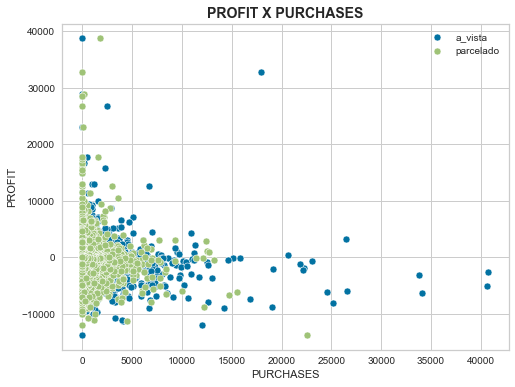

In [26]:
plt.subplots(figsize=(8, 6))
plt.title('PROFIT X PURCHASES',fontsize=14, fontweight='bold')
sns.scatterplot(data=data_new, y='PROFIT', x='ONEOFF_PURCHASES', label='a_vista')
sns.scatterplot(data=data_new, y='PROFIT', x='INSTALLMENTS_PURCHASES', label='parcelado')
plt.ylabel("PROFIT")
plt.xlabel("PURCHASES")

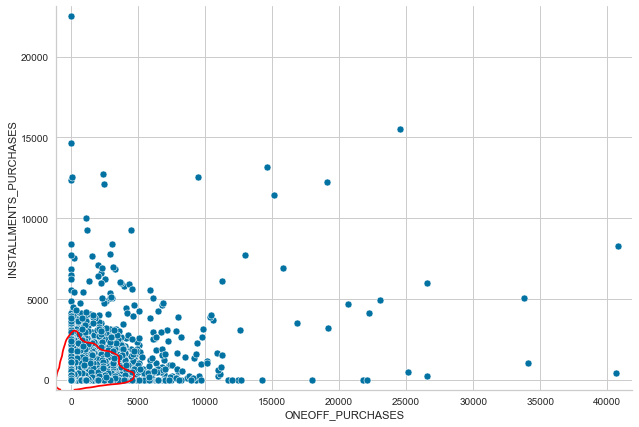

In [27]:
sns.pairplot(data=data_new, x_vars='ONEOFF_PURCHASES', y_vars='INSTALLMENTS_PURCHASES', height=6, aspect=1.5).map(sns.kdeplot, levels=1, color='red');

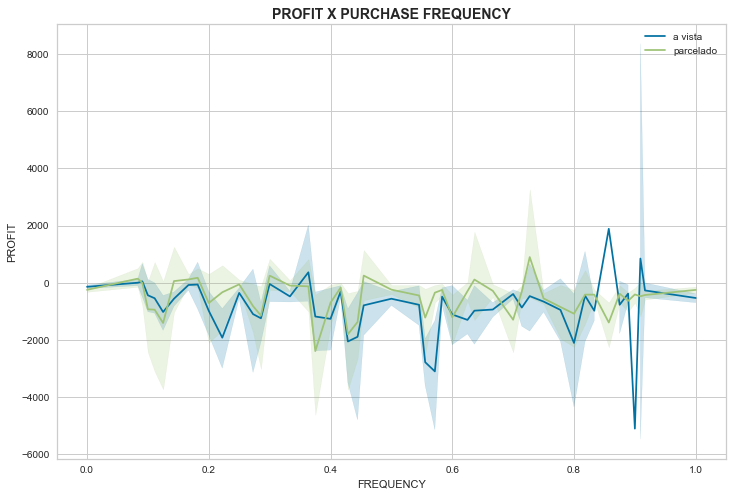

In [28]:
plt.subplots(figsize=(12, 8))
plt.title('PROFIT X PURCHASE FREQUENCY',fontsize=14, fontweight='bold')
sns.lineplot(data=data_new, y='PROFIT', x='ONEOFF_PURCHASES_FREQUENCY', label='a vista');
sns.lineplot(data=data_new, y='PROFIT', x='PURCHASES_INSTALLMENTS_FREQUENCY', label='parcelado');
plt.xlabel("FREQUENCY");

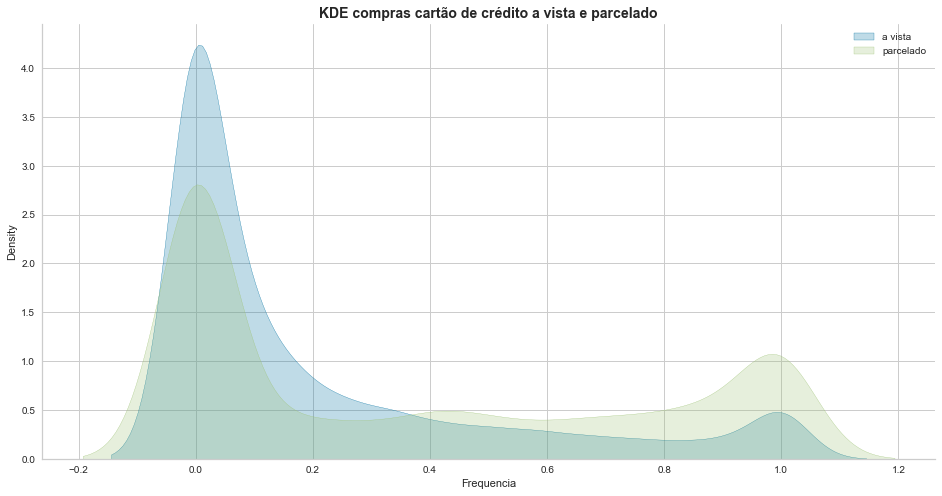

In [29]:
plt.figure(figsize=(16,8))
plt.title('KDE compras cartão de crédito a vista e parcelado',fontsize=14, fontweight='bold')
sns.kdeplot(data=data_new, x='ONEOFF_PURCHASES_FREQUENCY', shade=True, label='a vista')
sns.kdeplot(data=data_new, x='PURCHASES_INSTALLMENTS_FREQUENCY', shade=True, label='parcelado')
plt.legend()
plt.xlabel("Frequencia")
sns.despine(left=False, bottom=False)

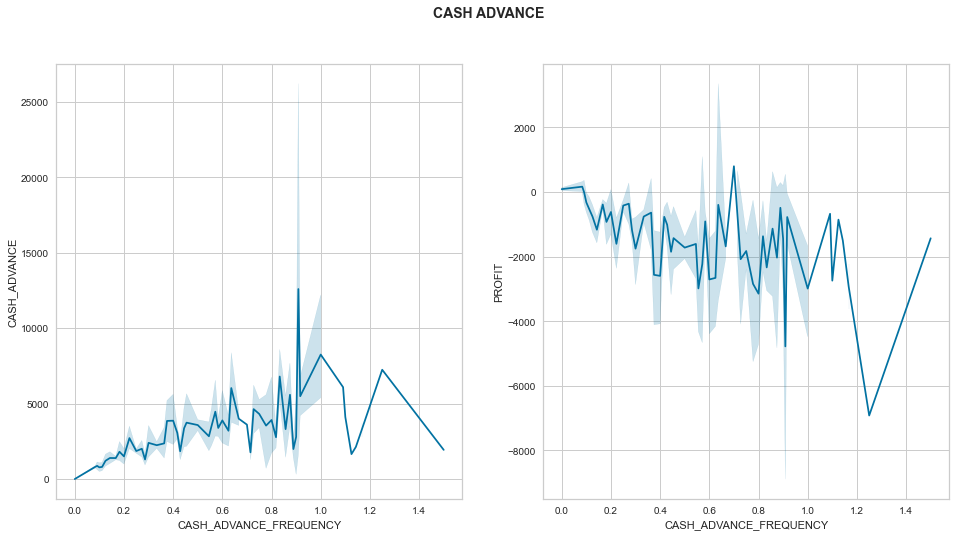

In [30]:
plt.figure(figsize=(16,8))
plt.suptitle('CASH ADVANCE',fontsize=14, fontweight='bold')
plt.subplot(1, 2, 1)
#plt.suptitle('CASH ADVANCE x CASH ADVANCE FREQUENCY',fontsize=14, fontweight='bold')
sns.lineplot(data=data_new, y='CASH_ADVANCE', x='CASH_ADVANCE_FREQUENCY');
plt.subplot(1, 2, 2)
#plt.suptitle('PROFIT x ADVANCE',fontsize=14, fontweight='bold')
sns.lineplot(data=data_new, y='PROFIT', x='CASH_ADVANCE_FREQUENCY');

**Analise:** Os adiantamentos em dinheiro do comerciante geralmente não são concedidos pelo provedor do cartão de crédito, mas são oferecidos em parceria com o processador de pagamentos para as vendas com cartões de crédito e débito. Ao contrário de um empréstimo típico, os adiantamentos de dinheiro do comerciante não cobram uma APR. Em vez disso, seu reembolso é baseado em um fator de suas vendas diárias. Isso significa que você fará um reembolso diário com base em suas vendas em um fator de 1,2 a 1,5.

In [31]:
aux_comp = zipsorted[['Rank', 'GrossRevenue']].groupby('Rank').sum().reset_index()
bins = list(np.arange( 0, 5000, 100))
aux_comp['RankBinned'] = pd.cut( aux_comp['Rank'], bins=bins )
aux_comp_binned = aux_comp[['RankBinned', 'GrossRevenue']].groupby( 'RankBinned' ).sum().reset_index()

NameError: name 'zipsorted' is not defined

In [ ]:
summary_stats(data_new.loc[(data_new.PRC_FULL_PAYMENT > 0)])

In [ ]:
data_new.loc[(data_new.PRC_FULL_PAYMENT > 0)]

In [ ]:
aux['PRC_FULL_PAYMENT_BINNED']=aux['PRC_FULL_PAYMENT'].apply(lambda x: '0%' if x==0
                                                  else '0-25%' if 0<x<0.25
                                                  else '25-50%' if 0.25<=x<0.50
                                                  else '50-75%' if 0.50<=x<0.75
                                                  else '75-100%' if 0.75<=x<=1                     
                                                  else 'unknow')

In [ ]:
plt.figure(figsize=(16,8))
#plt.suptitle('Sales by Customer Binned Rank', fontsize=18)
sns.countplot( x='PRC_FULL_PAYMENT_BINNED', data=aux);
plt.xticks( rotation=90 );

## Analise Multivariada

In [ ]:
mask = np.zeros_like(data_new.corr(), dtype=bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))

plt.title('Pearson Correlation Matrix',fontsize=14, fontweight='bold')

sns.heatmap(data_new.corr(method='spearman'), linewidths=0.25,fmt=".2f", cmap="Blues", linecolor='w',annot=True,annot_kws={"size":9},mask=mask,cbar_kws={"shrink": .9});

- Existe uma grande correlação com a modalidade de compra com a frequencia da compra, ONEOFF_PURCHASES / ONEOFF_PURCHASES_FREQUENCY, INSTALLMENTS_PURCHASES / PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE / CASH_ADVANCE_FREQUENCY,

- Clientes que possuem adiantamento de crédito costumam pagar menos as taxas do cartão. O que nos remete um pouco da teoria quando é dio que operações de crédito possuem um roscp

- A correlação negativa entre PRC_FULL_PAYMENTE e MINIMUN_PAYMENTS era esperado, já que quanto mais o cliente paga sua fatura do cartão os pagamentos minímos requeridos são reduzidos.

## Insights

- Obeserva-se que o cliente não necessariamente precisa fazer compras com o cartão de crédito para que o saldo do cartão de crédito altere, isso acontece diversos fatores, como a inclusão de juros, pagamento de anuidade ou taxas administrativas, e até mesmo o cálculo de saldo devedor, que é a soma dos valores devidos e não pagos nas últimas faturas.

- Existem dois perfis de clientes dominantes de clientes com relação a frequencia de uso do cartão de crédito, os clientes que quase não utilizam o cartão de crédito e os que frequentemente utilizam o cartão de crédito. O que mostra que muitas pessoas provavelmente possuem receio ou desconhhecimento de como operar com cartão de crédito.

- Clientes que fazem grandes compras no cartão de crédito são mais propícios a serem mals pagadores.

- 51,71% dos clientes não solicitaram nenhuma vez adiantamento em dinheiro neste periodo.

- 48,39% dos cliente não fazem nenhuma compra pontual e apenas 16,87% dos clientes fizeram compras pontuais no cartão de crédito no valor superior a \$\1000. As vezes esse perfil de cliente nesse Banco preferem outras modalidades de emprestimo, para compras superiores ao seu padrão normal de consumo que não seja pelo disponível no cartão de crédito 

- A maioria dos clientes s

- Ao investigar mais a coluna SALDO, parece que há muitos cartões de crédito com saldo 0. Também é compatível com outros valores de compra 0 na coluna COMPRA. Com base nesses resultados, pode-se supor que alguns usuários estão intencionalmente mantendo o saldo baixo em sua conta para obter um limite de crédito alto, o que afeta o aumento da taxa de utilização de crédito e a pontuação de crédito.